<a href="https://colab.research.google.com/github/nhamhung/Coder-School-Machine-Learning/blob/master/Logistic_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab - Logistic Regression

## Logistic Regression from scratch

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Dataset **Titanic**

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/titanic.csv')

# Data manipulation
titanic.fillna(titanic['Age'].mean(), inplace=True)
titanic.replace({'Sex':{'male':0, 'female':1}}, inplace=True)
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,FamilySize
0,0,3,0,22.0,2
1,1,1,1,38.0,2
2,1,3,1,26.0,1
3,1,1,1,35.0,2
4,0,3,0,35.0,1


In [ ]:
from sklearn.model_selection import train_test_split

X = titanic[['Pclass', 'Sex', 'Age', 'FamilySize']].values
y = titanic[['Survived']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (712, 4) (712, 1)
Test set: (179, 4) (179, 1)


### Scikit-learn Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import log_loss

# Create Logistics Regression model from X and y
lg = LogisticRegression()
lg.fit(X_train, y_train)
predictions = lg.predict(X_test)

# Show metrics
print("Accuracy score: %f" % accuracy_score(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('Log loss:', log_loss(y_test, predictions)/len(y_test))

# Show parameters
print('w = ', lg.coef_)
print('b = ', lg.intercept_)

Accuracy score: 0.793296
Confusion Matrix:
[[97 17]
 [20 45]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       114
           1       0.73      0.69      0.71        65

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179

Log loss: 0.039884782615024775
w =  [[-1.18387774  2.56284417 -0.04074789 -0.21591208]]
b =  [2.84100084]


### Handmade Logistic Regression

**Forward Propagation:**
$$Z = Xw + b$$
$$\hat{y} = \sigma(Z) =\sigma(Xw + b) $$
$$J(w, b) = -\frac{1}{m}\sum_{i=1}^m{ \Big( y^{(i)} log( \hat{y}^{(i)}) + (1-y^{(i)}) log(1 - \hat{y}^{(i)}) \Big)} \tag{5}$$

**and Backward**

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X^T(\hat{y}-y)\tag{6}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (\hat{y}^{(i)}-y^{(i)})\tag{7}$$

In [ ]:
# Initialize params
def initialize_params(X):
    '''Initialize w, b with zeros and return'''
    w = np.zeros((X.shape[1], 1))
    b = np.zeros((1, 1))
    return w, b

In [ ]:
# Implement sigmoid
def sigmoid(Z):
    return 1/(1 + np.exp(-Z))

In [ ]:
# Forward propagation
def forward(w, b, X):
    '''Return y_hat'''
    return sigmoid(np.dot(X, w) + b)

In [ ]:
# Binary cross entropy loss
def binary_cross_entropy(y, y_hat):
    '''Calculate loss function J and return'''
    return -(np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))

In [ ]:
# Backward propagation
def backward(X, y, y_hat, w, b):
    '''Calculate dw, db and return'''
    m = X.shape[0]
    dw = (1/m) * np.dot(X.T, (y_hat - y))
    db = (1/m) * np.sum(y_hat - y, keepdims=True)
    return dw, db

# Update parameters
def update_params(w, b, dw, db, learning_rate):
    '''Update w, b and return'''
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b

In [ ]:
# Training process
def train(X, y, iterations, learning_rate):
    '''Train w, b and return'''
    w, b = initialize_params(X)

    history = {'train_loss': np.array([]),
               'test_loss': np.array([]),
               'lr': np.array([])}

    for i in range(iterations):
        y_hat = forward(w, b, X)
        J = binary_cross_entropy(y, y_hat)
        history['train_loss'] = np.append(history['train_loss'], J)
        J_test = binary_cross_entropy(y_test, forward(w, b, X_test))
        history['test_loss'] = np.append(history['test_loss'], J_test)
        if i % 100 == 0:
            # history['loss'] = np.append(history['loss'], J)
            history['lr'] = np.append(history['lr'], learning_rate)
            # learning_rate = 10 * learning_rate
            # print(f'Step {i}, loss: {J}')
        dw, db = backward(X, y, y_hat, w, b)
        w, b = update_params(w, b, dw, db, learning_rate)
    return w, b, history

In [ ]:
history

In [ ]:
# Predict
def predict(w, b, X):
    '''Return predicted y of X'''
    y_hat = forward(w, b, X)
    return y_hat > 0.5

**Evaluation**

In [ ]:
# Train the model and predict X_test
w, b, history = train(X_train, y_train, iterations=20000, learning_rate=5e-3)
predictions = predict(w, b, X_test)

In [ ]:
X_train

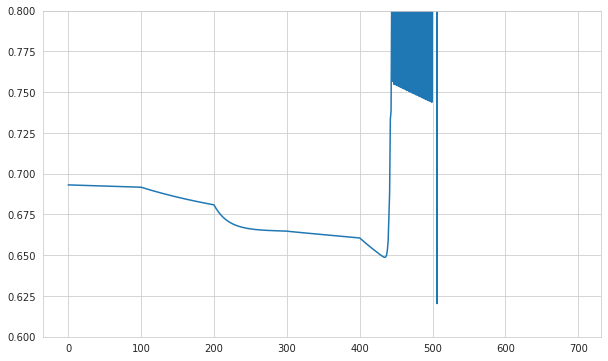

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history['loss'])
# plt.xlim(200, 400)
plt.ylim(0.6, 0.8)
plt.show()

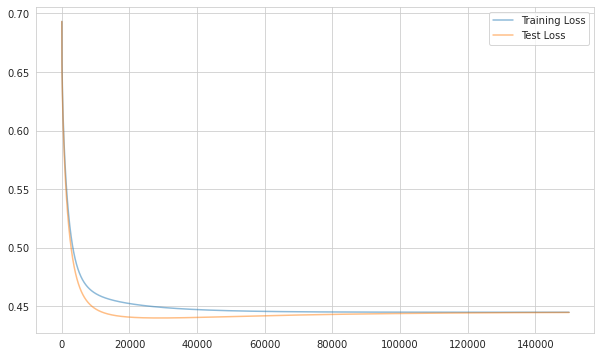

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history['train_loss'], label='Training Loss', alpha=0.5)
plt.plot(history['test_loss'], label='Test Loss', alpha=0.5)
# plt.xlim(0, 20000)
# plt.ylim(0.6, 0.8)
plt.legend()
plt.show()

In [ ]:
# Evaluation
print("Accuracy score: %f" % accuracy_score(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

# Show parameters
print('w = ', w)
print('b = ', b)

Accuracy score: 0.815642
Confusion Matrix:
[[101  13]
 [ 20  45]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       114
           1       0.78      0.69      0.73        65

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179

w =  [[-0.87824484]
 [ 2.5911979 ]
 [-0.02037684]
 [-0.15302052]]
b =  [[1.36084782]]


In [ ]:
# Output of sklearn.LogisticRegression
# Accuracy score: 0.793296
# Confusion Matrix:
# [[97 17]
#  [20 45]]
#               precision    recall  f1-score   support

#            0       0.83      0.85      0.84       114
#            1       0.73      0.69      0.71        65

#     accuracy                           0.79       179
#    macro avg       0.78      0.77      0.77       179
# weighted avg       0.79      0.79      0.79       179

# Log loss: 0.039884782615024775
# w =  [[-1.18387774  2.56284417 -0.04074789 -0.21591208]]
# b =  [2.84100084]

**Well done!**